In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [75]:

from sklearn.datasets import load_boston
boston = load_boston()

/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative dataset

In [76]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [77]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [78]:
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)

In [79]:
dataset['Price']=boston.target

In [80]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [82]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [83]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [84]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [85]:
#sns.pairplot(dataset)

Text(0, 0.5, 'Price')

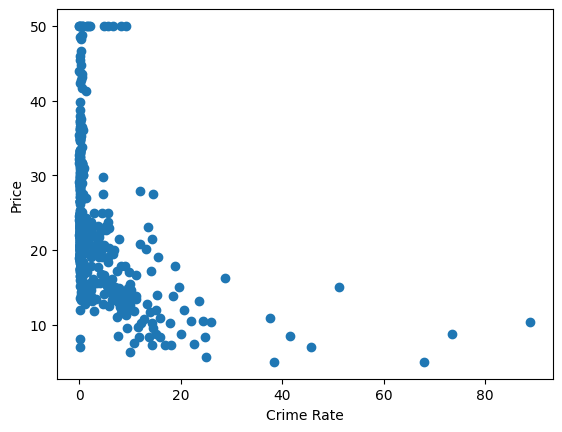

In [86]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

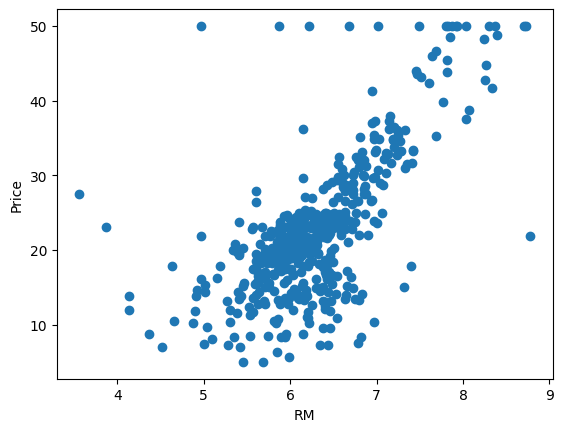

In [87]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='Price'>

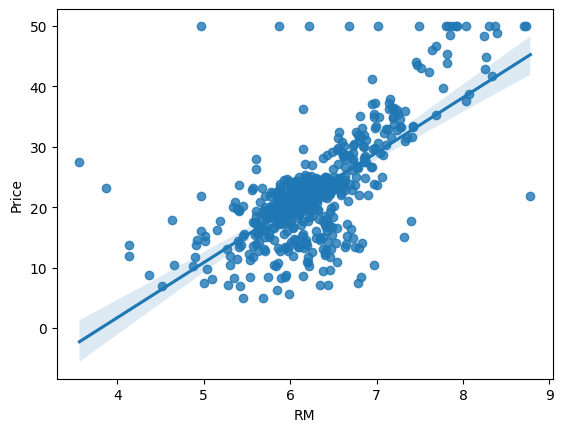

In [88]:
sns.regplot(x='RM',y="Price",data = dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

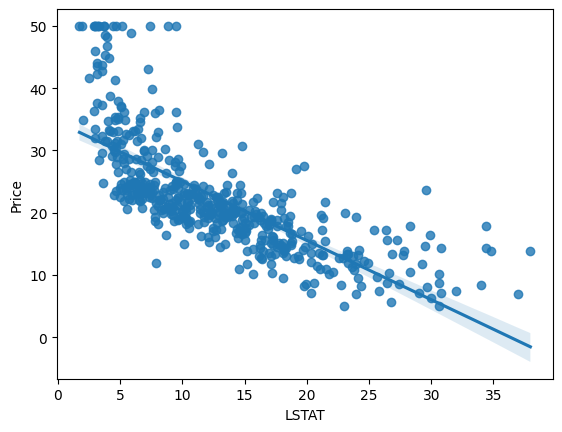

In [89]:
sns.regplot(x='LSTAT',y="Price",data = dataset)

<Axes: xlabel='CHAS', ylabel='Price'>

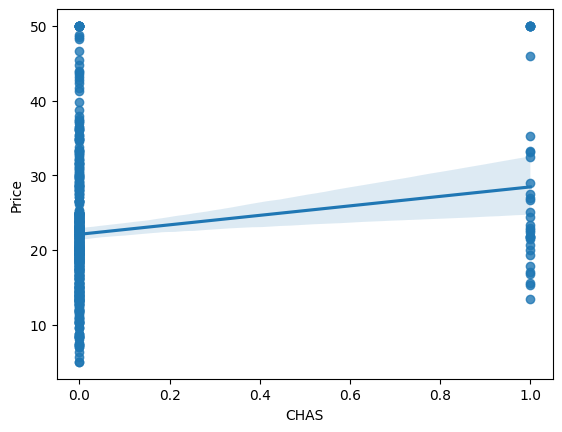

In [90]:
sns.regplot(x='CHAS',y="Price",data = dataset)

<Axes: xlabel='PTRATIO', ylabel='Price'>

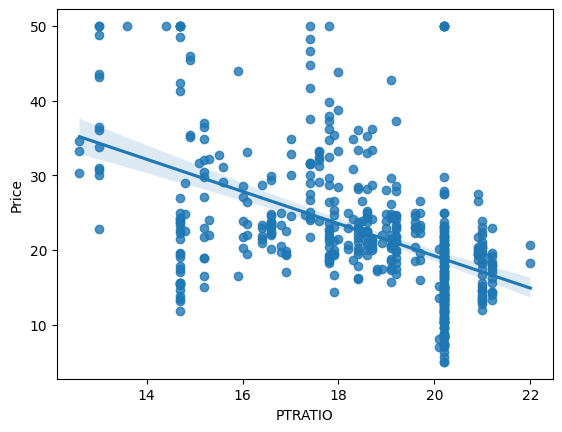

In [91]:
sns.regplot(x='PTRATIO',y="Price",data = dataset)

In [92]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [100]:
y.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [95]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60


In [96]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-pack

In [97]:
X_test = scalar.transform(X_test)

/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [98]:
import pickle
pickle.dump(scalar,open('scaling.pkl','wb'))

In [73]:
X_test

array([[ 5.18171917, -0.49797742,  1.05568658, ...,  0.82546777,
        -4.07643237, -0.3442153 ],
       [-0.37633249, -0.49797742, -0.93691481, ...,  0.02744929,
         0.3628112 , -0.84058658],
       [-0.37867961,  0.37320621, -1.10674711, ..., -1.6624722 ,
         0.30596792, -1.22465039],
       ...,
       [-0.21975237, -0.49797742,  1.27236917, ..., -1.75635672,
        -0.21473473,  0.09530899],
       [ 0.95009414, -0.49797742,  1.05568658, ...,  0.82546777,
        -3.82525116,  0.42945837],
       [ 0.00574946, -0.49797742,  1.05568658, ...,  0.82546777,
         0.37500004,  0.24505228]])

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [29]:
print(regression.coef_)

[-0.9281326   0.91733243  0.51483834  0.062497   -1.6306264   3.42029822
 -0.2106865  -2.81921261  2.3080726  -2.16656895 -2.03787778  0.5639928
 -3.50931538]


In [30]:
print(regression.intercept_)

22.761864406779686


In [31]:
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [32]:
reg_pred = regression.predict(X_test)

In [33]:
reg_pred

array([15.4757088 , 27.85786595, 39.71821366, 17.94591734, 30.19441873,
       37.51057831, 25.20492485, 11.29301795, 13.93325033, 32.10798674,
       28.51346127, 19.10242965, 14.16909335, 30.59883198, 16.91765089,
       21.57521646, 20.56956106, 38.0388848 , 18.28489886, 15.44455502,
       13.942728  , 22.89202676, 33.08289616, 38.85747118, 29.91747968,
       22.34030137, 17.88075723, 20.6598468 , 23.37690089, 20.51319684,
       25.78620928, 33.83339852, 15.33132641, 21.79161378, 24.14376798,
       35.2106862 , 29.20302521, 18.566505  , 13.9622867 , 38.63492008,
       31.18122326, 19.10959362, 19.1273964 , 39.74779582,  8.86534866,
       27.28051165, 19.04476095, 25.44873252, 15.50076478, 26.17581245,
       33.69571146, 24.40124874, 19.39414746, 12.55330545, 24.50462883,
       18.21889479, 10.63052092,  2.28680811, 31.72266364, 13.46355579,
       20.09462113, 22.38725561, 19.98251601, 17.86587813, 24.34154548,
       26.93269765, 25.82034717, 22.2255162 , 24.67832008, 30.36

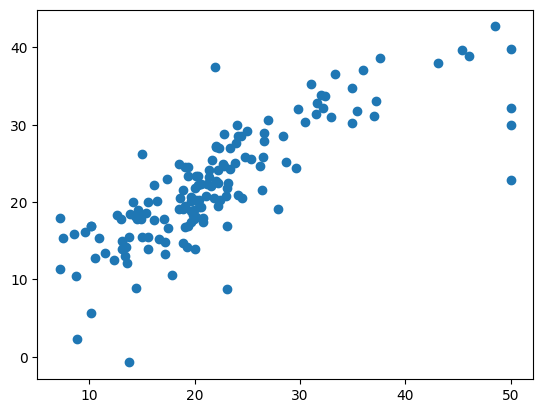

In [34]:
plt.scatter(y_test,reg_pred)

In [35]:
residual = y_test-reg_pred

In [36]:
residual

410   -0.475709
85    -1.257866
280    5.681786
422    2.854083
199    4.705581
         ...   
310   -1.599390
91    -5.061577
151    0.740793
426   -6.727166
472    0.729488
Name: Price, Length: 152, dtype: float64

/var/folders/m3/3hn5yzpj7x3g6p2qhbyhpd9w0000gn/T/ipykernel_91637/936630578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: xlabel='Price', ylabel='Density'>

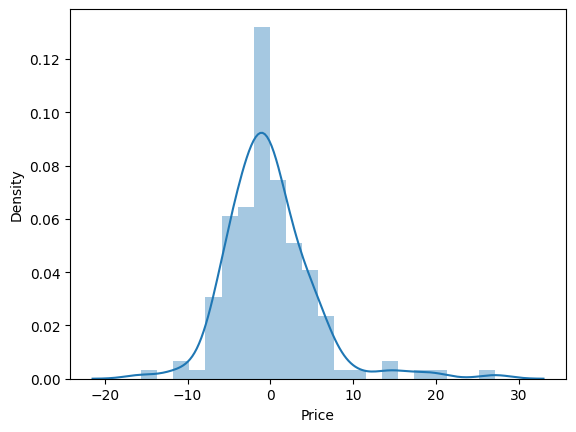

In [37]:
sns.distplot(residual,kde=True)

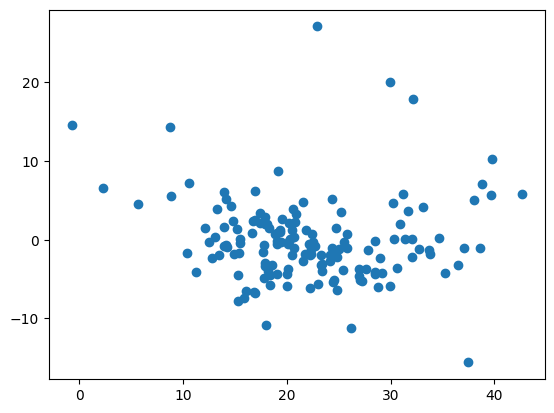

In [38]:
plt.scatter(reg_pred,residual)

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.6913626771162575
28.405854810508238
5.329714327288869


In [40]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.6485645742370704


In [41]:
# adjustedr2

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6154583384767944

In [42]:
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [43]:
scalar.transform(boston.data[0].reshape(1,-1))

/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.38188527,  0.28608784, -1.25608241, -0.2511236 , -0.10590692,
         0.36860045, -0.0869086 ,  0.11122296, -0.97340113, -0.63547727,
        -1.47470314,  0.41521182, -1.05549593]])

In [44]:
regression.predict(scalar.transform(boston.data[0].reshape(1,-1)))

/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.92816998])

In [45]:
import pickle

In [46]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [47]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [48]:
pickled_model.predict(scalar.transform(boston.data[0].reshape(1,-1)))

/Users/apple/Desktop/Boston_House/bostonhouseprice/myenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.92816998])